DDXPlus_EDA 

In [11]:
import pandas as pd

# Example: Adjust the path/filename as needed for your dataset
df = pd.read_csv("release_train_patients.csv")
print(df.head())
print(f"Dataset shape: {df.shape}")


   AGE                             DIFFERENTIAL_DIAGNOSIS SEX  \
0   18  [['Bronchitis', 0.19171203430383882], ['Pneumo...   M   
1   21  [['HIV (initial infection)', 0.518950056440760...   M   
2   19  [['Bronchitis', 0.11278064619119596], ['Pneumo...   F   
3   34  [['URTI', 0.23859396799565236], ['Cluster head...   F   
4   36  [['URTI', 0.23677812769175735], ['Influenza', ...   M   

                 PATHOLOGY                                          EVIDENCES  \
0                     URTI  ['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54...   
1  HIV (initial infection)  ['E_9', 'E_27', 'E_50', 'E_51', 'E_53', 'E_54_...   
2                Pneumonia  ['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55...   
3                     URTI  ['E_48', 'E_53', 'E_54_@_V_183', 'E_55_@_V_89'...   
4                     URTI  ['E_49', 'E_50', 'E_53', 'E_54_@_V_183', 'E_55...   

  INITIAL_EVIDENCE  
0             E_91  
1             E_50  
2             E_77  
3             E_53  
4            E_20

In [12]:
# Data types and summary statistics
print(df.info())
print(df.describe(include="all"))

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025602 entries, 0 to 1025601
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   AGE                     1025602 non-null  int64 
 1   DIFFERENTIAL_DIAGNOSIS  1025602 non-null  object
 2   SEX                     1025602 non-null  object
 3   PATHOLOGY               1025602 non-null  object
 4   EVIDENCES               1025602 non-null  object
 5   INITIAL_EVIDENCE        1025602 non-null  object
dtypes: int64(1), object(5)
memory usage: 46.9+ MB
None
                 AGE                             DIFFERENTIAL_DIAGNOSIS  \
count   1.025602e+06                                            1025602   
unique           NaN                                             241312   
top              NaN  [['Localized edema', 0.6962440370572797], ['Ch...   
freq             NaN                                              10167   
mean    3.971484e+01     

## Age Distribution

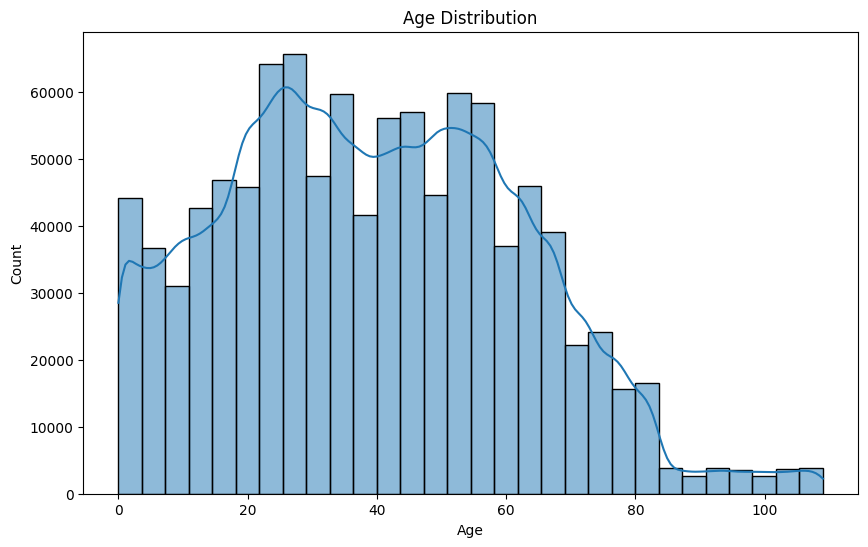

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Sex Distribution


SEX Distribution:
SEX
F    527798
M    497804
Name: count, dtype: int64


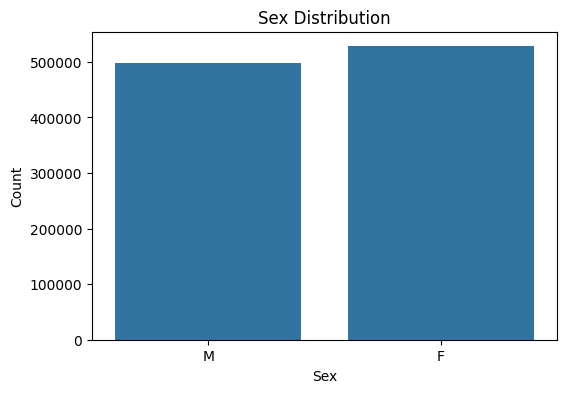

In [25]:
print("\nSEX Distribution:")
sex_counts = df['SEX'].value_counts()
print(sex_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=df)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


## Examine Pathology

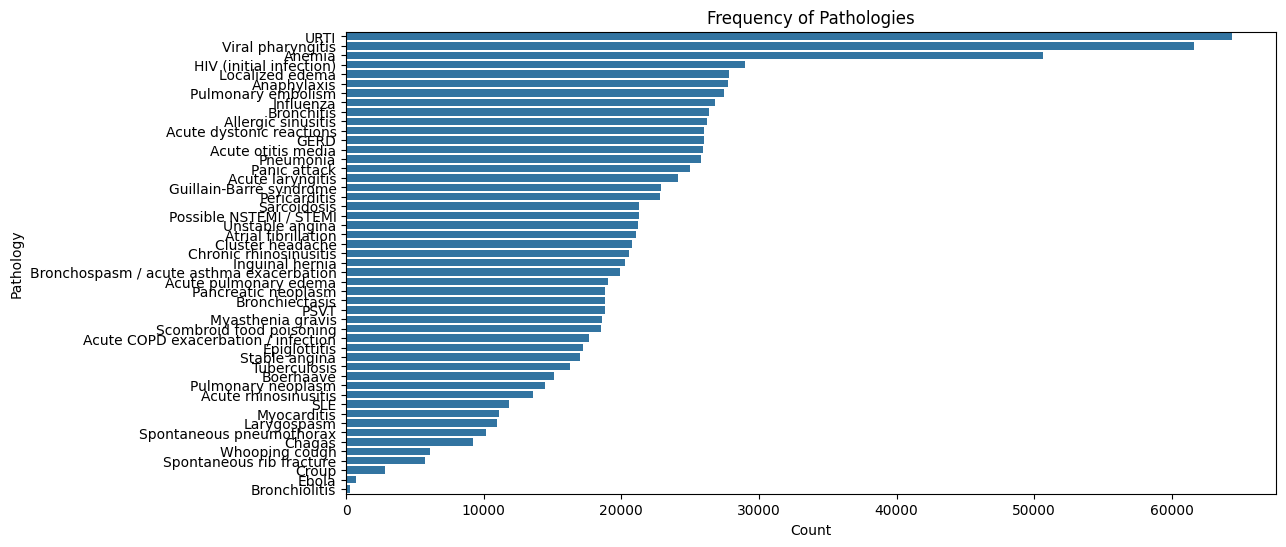

In [17]:
plt.figure(figsize=(12, 6))
order = df['PATHOLOGY'].value_counts().index
sns.countplot(y='PATHOLOGY', data=df, order=order)
plt.title("Frequency of Pathologies")
plt.xlabel("Count")
plt.ylabel("Pathology")
plt.show()


## Processing and Analyzing the Differential Diagnosis

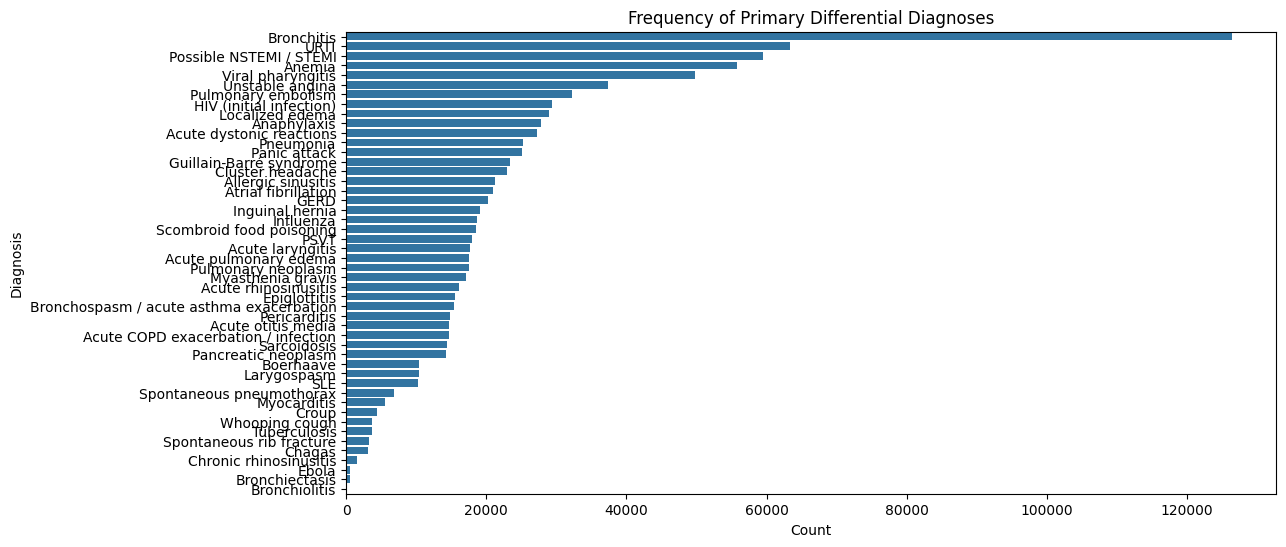

In [18]:
import ast

# Safely evaluate the string representations to Python lists
def parse_diff_diag(x):
    try:
        # If x is already a list, leave it as is
        if isinstance(x, list):
            return x
        return ast.literal_eval(x)
    except Exception as e:
        print("Error parsing:", x)
        return None

df['DIFF_DIAG'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(parse_diff_diag)

# Let's extract the primary (first) diagnosis from each entry (if available)
def get_primary_diag(x):
    if isinstance(x, list) and len(x) > 0:
        return x[0][0]  # assuming the first element is the diagnosis name
    return None

df['primary_diag'] = df['DIFF_DIAG'].apply(get_primary_diag)

# Plot the frequency of primary differential diagnoses
plt.figure(figsize=(12, 6))
order = df['primary_diag'].value_counts().index
sns.countplot(y='primary_diag', data=df, order=order)
plt.title("Frequency of Primary Differential Diagnoses")
plt.xlabel("Count")
plt.ylabel("Diagnosis")
plt.show()


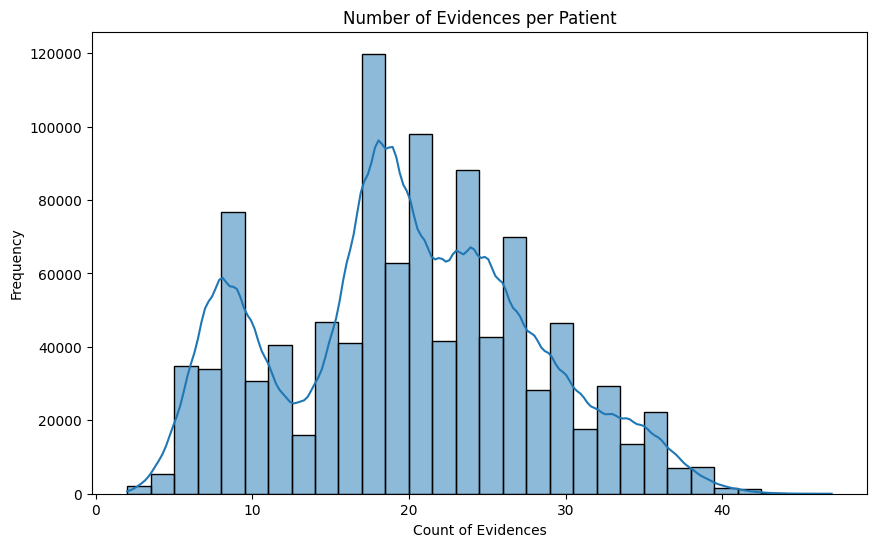

In [19]:
# Convert EVIDENCES from string to list if necessary
def parse_evidences(x):
    try:
        if isinstance(x, list):
            return x
        return ast.literal_eval(x)
    except Exception as e:
        print("Error parsing evidences:", x)
        return None

df['EVIDENCE_LIST'] = df['EVIDENCES'].apply(parse_evidences)

# Calculate the number of evidences per patient
df['num_evidences'] = df['EVIDENCE_LIST'].apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(df['num_evidences'], bins=30, kde=True)
plt.title("Number of Evidences per Patient")
plt.xlabel("Count of Evidences")
plt.ylabel("Frequency")
plt.show()


## Age vs. Pathology

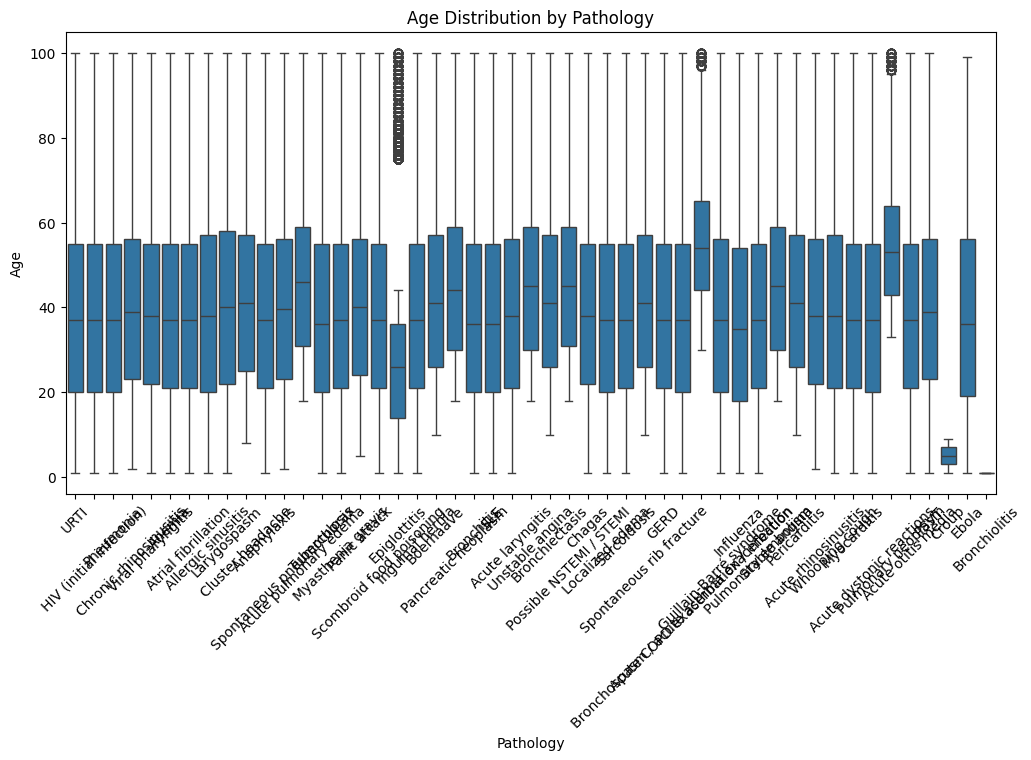

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PATHOLOGY', y='AGE', data=df)
plt.title("Age Distribution by Pathology")
plt.xlabel("Pathology")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


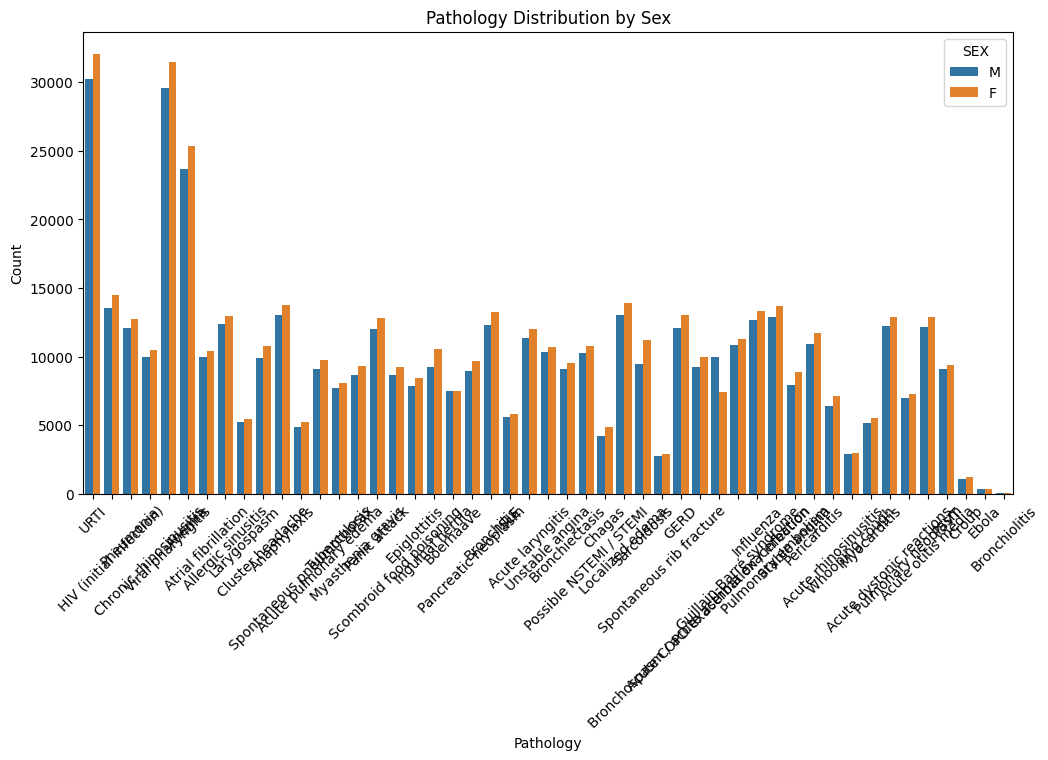

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PATHOLOGY', hue='SEX', data=df)
plt.title("Pathology Distribution by Sex")
plt.xlabel("Pathology")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Dataset shape: (1025602, 6)

First 5 rows:
   AGE                             DIFFERENTIAL_DIAGNOSIS SEX  \
0   18  [['Bronchitis', 0.19171203430383882], ['Pneumo...   M   
1   21  [['HIV (initial infection)', 0.518950056440760...   M   
2   19  [['Bronchitis', 0.11278064619119596], ['Pneumo...   F   
3   34  [['URTI', 0.23859396799565236], ['Cluster head...   F   
4   36  [['URTI', 0.23677812769175735], ['Influenza', ...   M   

                 PATHOLOGY                                          EVIDENCES  \
0                     URTI  ['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54...   
1  HIV (initial infection)  ['E_9', 'E_27', 'E_50', 'E_51', 'E_53', 'E_54_...   
2                Pneumonia  ['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55...   
3                     URTI  ['E_48', 'E_53', 'E_54_@_V_183', 'E_55_@_V_89'...   
4                     URTI  ['E_49', 'E_50', 'E_53', 'E_54_@_V_183', 'E_55...   

  INITIAL_EVIDENCE  
0             E_91  
1             E_50  
2             E_

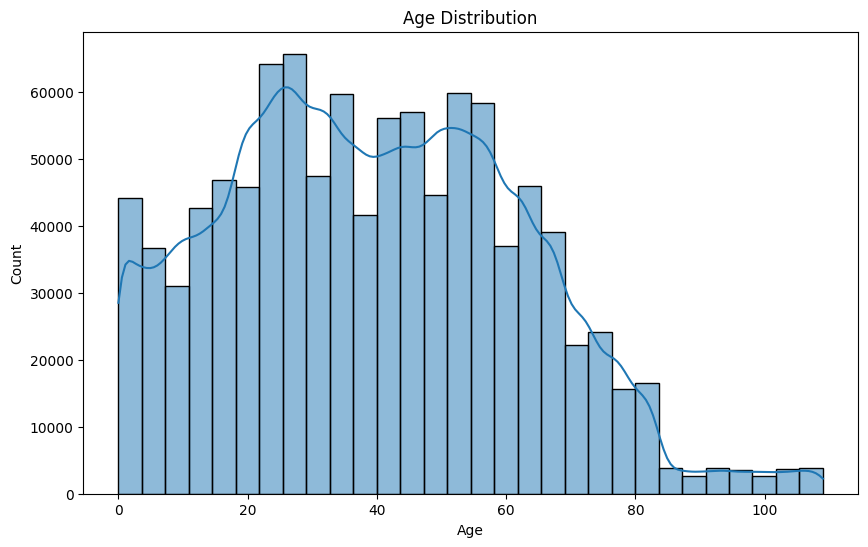


SEX Distribution:
SEX
F    527798
M    497804
Name: count, dtype: int64


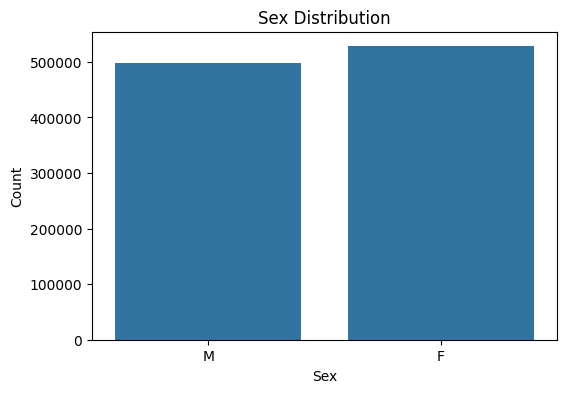


PATHOLOGY Distribution:
PATHOLOGY
URTI                                        64368
Viral pharyngitis                           61642
Anemia                                      50665
HIV (initial infection)                     29013
Localized edema                             27825
Anaphylaxis                                 27718
Pulmonary embolism                          27468
Influenza                                   26812
Bronchitis                                  26400
Allergic sinusitis                          26203
Acute dystonic reactions                    25982
GERD                                        25979
Acute otitis media                          25917
Pneumonia                                   25761
Panic attack                                25019
Acute laryngitis                            24129
Guillain-Barré syndrome                     22867
Pericarditis                                22785
Sarcoidosis                                 21285
Possible NSTEMI

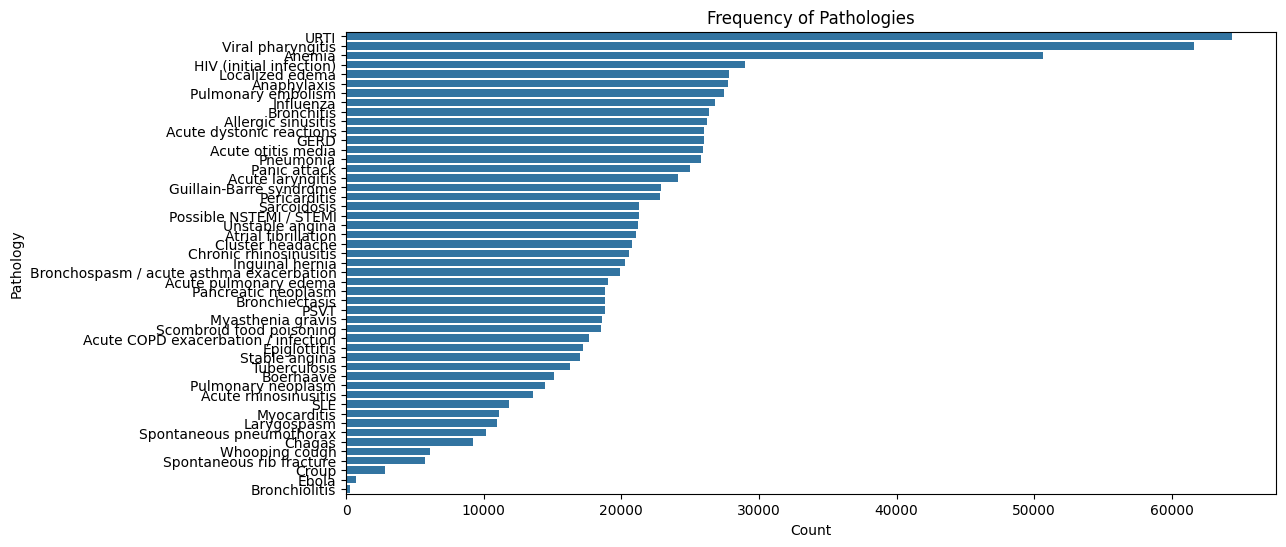


Primary Differential Diagnosis Distribution:
primary_diag
Bronchitis                                  126412
URTI                                         63324
Possible NSTEMI / STEMI                      59427
Anemia                                       55812
Viral pharyngitis                            49827
Unstable angina                              37333
Pulmonary embolism                           32210
HIV (initial infection)                      29444
Localized edema                              28949
Anaphylaxis                                  27740
Acute dystonic reactions                     27279
Pneumonia                                    25213
Panic attack                                 25134
Guillain-Barré syndrome                      23434
Cluster headache                             23027
Allergic sinusitis                           21261
Atrial fibrillation                          21016
GERD                                         20214
Inguinal hernia        

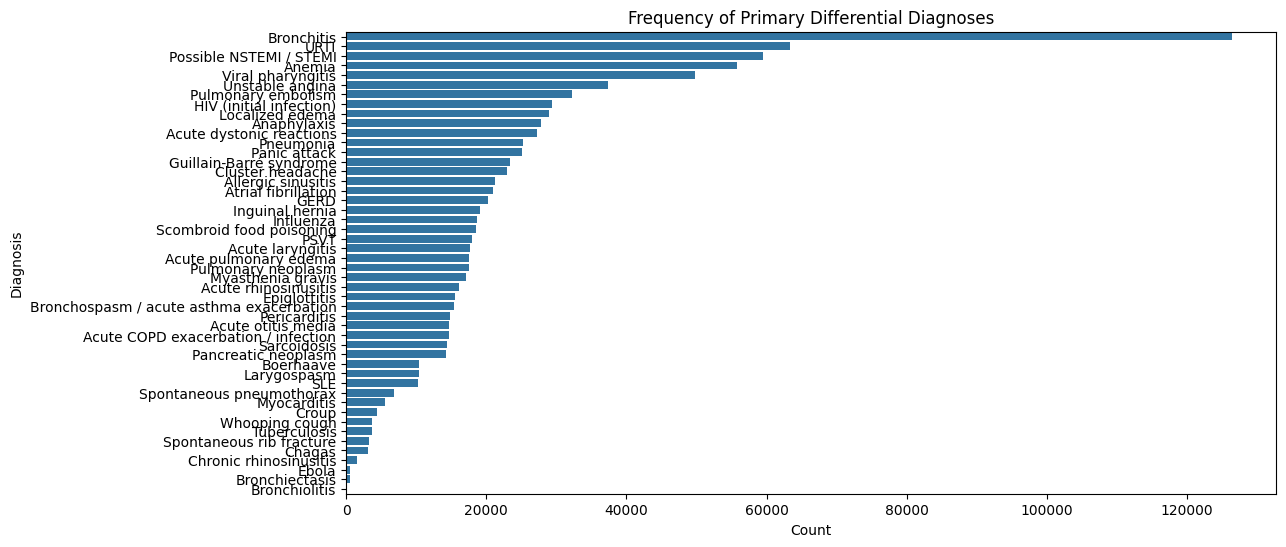


Evidence Count per Patient:
count    1.025602e+06
mean     1.969099e+01
std      8.043986e+00
min      2.000000e+00
25%      1.400000e+01
50%      2.000000e+01
75%      2.500000e+01
max      4.700000e+01
Name: num_evidences, dtype: float64


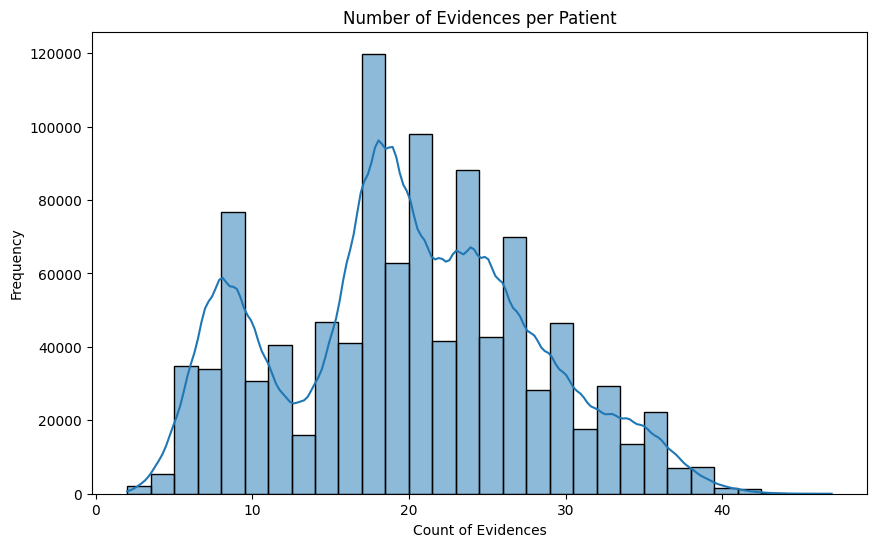


Evidence Code Frequency:
EVIDENCE_LIST
E_204_@_V_10    948236
E_53            788079
E_57_@_V_123    581387
E_66            399695
E_201           319418
E_54_@_V_161    308543
E_79            287363
E_54_@_V_192    222016
E_91            216215
E_181           202756
Name: count, dtype: int64


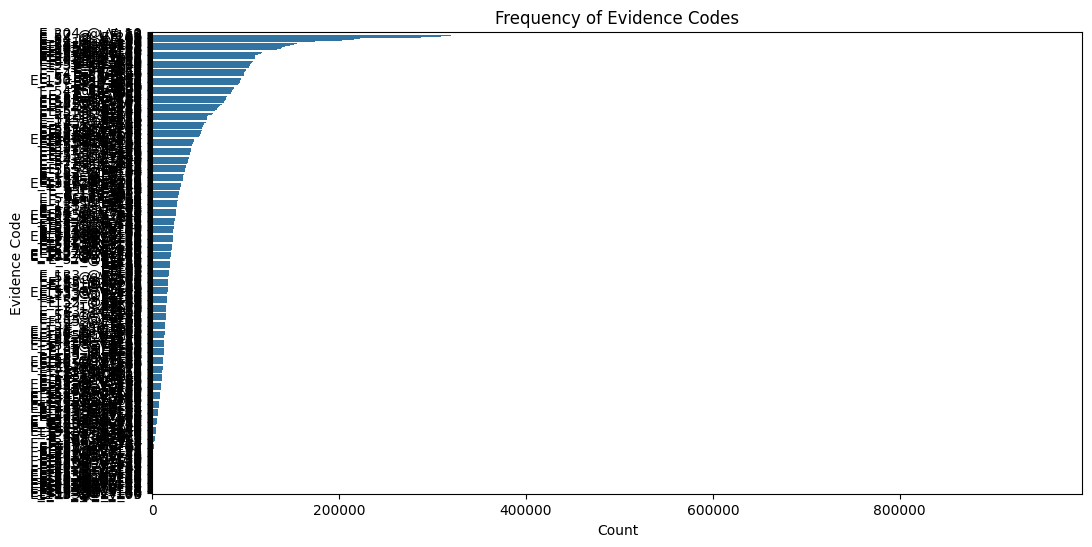


Age by Pathology:
                                            count       mean        std   min  \
PATHOLOGY                                                                       
Acute COPD exacerbation / infection       17661.0  55.985335  16.094081  30.0   
Acute dystonic reactions                  25982.0  37.926603  23.360998   0.0   
Acute laryngitis                          24129.0  38.200630  23.159996   0.0   
Acute otitis media                        25917.0  37.759965  23.148340   0.0   
Acute pulmonary edema                     19018.0  46.993532  18.965916  18.0   
Acute rhinosinusitis                      13578.0  39.943512  22.074458   2.0   
Allergic sinusitis                        26203.0  39.354769  24.550531   0.0   
Anaphylaxis                               27718.0  37.686125  23.202405   0.0   
Anemia                                    50665.0  38.021218  23.283368   0.0   
Atrial fibrillation                       21036.0  37.882535  23.039086   0.0   
Boerhaave

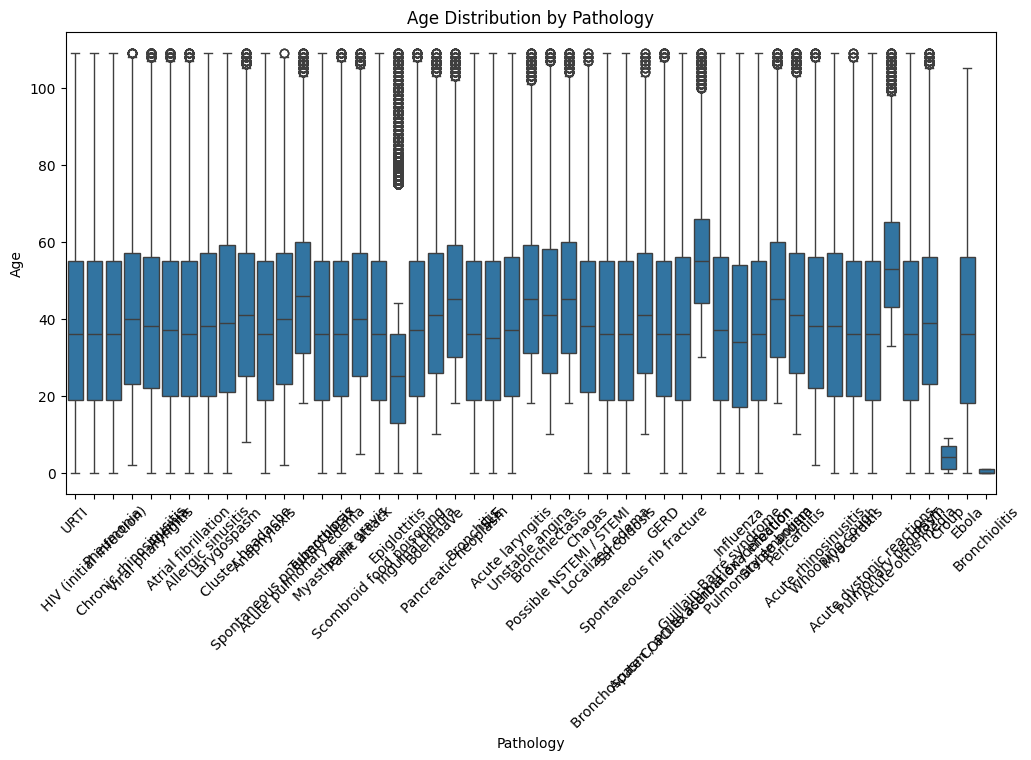


Pathology by Sex:
SEX                                           F      M
PATHOLOGY                                             
Acute COPD exacerbation / infection        7549  10112
Acute dystonic reactions                  13339  12643
Acute laryngitis                          12423  11706
Acute otitis media                        13353  12564
Acute pulmonary edema                      9819   9199
Acute rhinosinusitis                       7156   6422
Allergic sinusitis                        13383  12820
Anaphylaxis                               14246  13472
Anemia                                    26194  24471
Atrial fibrillation                       10758  10278
Boerhaave                                  7547   7533
Bronchiectasis                             9644   9151
Bronchiolitis                               138    123
Bronchitis                                13694  12706
Bronchospasm / acute asthma exacerbation  10309   9566
Chagas                                     496

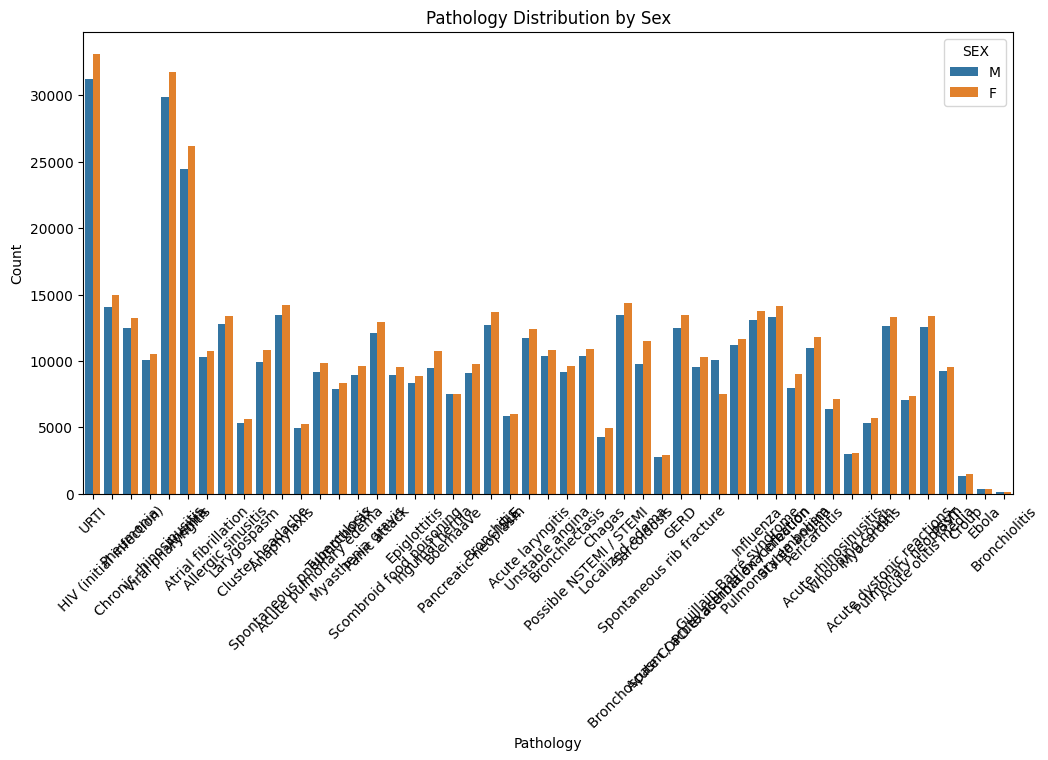

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# -------------------------------
# 1. Load the Data
# -------------------------------

# Adjust the file path as necessary
df = pd.read_csv("release_train_patients.csv")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# -------------------------------
# 2. Basic Overview and Data Quality Checks
# -------------------------------

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include="all"))

print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# -------------------------------
# 3. Analyze the Demographics
# -------------------------------

## a. AGE Distribution

print("\nAGE Distribution Statistics:")
print(df['AGE'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## b. SEX Distribution

print("\nSEX Distribution:")
sex_counts = df['SEX'].value_counts()
print(sex_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=df)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 4. Examine Pathology
# -------------------------------

print("\nPATHOLOGY Distribution:")
pathology_counts = df['PATHOLOGY'].value_counts()
print(pathology_counts)

plt.figure(figsize=(12, 6))
order = pathology_counts.index
sns.countplot(y='PATHOLOGY', data=df, order=order)
plt.title("Frequency of Pathologies")
plt.xlabel("Count")
plt.ylabel("Pathology")
plt.show()

# -------------------------------
# 5. Processing and Analyzing the Differential Diagnosis
# -------------------------------

# Convert DIFFERENTIAL_DIAGNOSIS from string representation to a Python list (if needed)
def parse_diff_diag(x):
    try:
        if isinstance(x, list):
            return x
        return ast.literal_eval(x)
    except Exception as e:
        print("Error parsing:", x)
        return None

df['DIFF_DIAG'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(parse_diff_diag)

# Extract primary diagnosis from each entry (if available)
def get_primary_diag(x):
    if isinstance(x, list) and len(x) > 0:
        return x[0][0]  # assuming the first element is the diagnosis name
    return None

df['primary_diag'] = df['DIFF_DIAG'].apply(get_primary_diag)
print("\nPrimary Differential Diagnosis Distribution:")
primary_diag_counts = df['primary_diag'].value_counts()
print(primary_diag_counts)

plt.figure(figsize=(12, 6))
order = primary_diag_counts.index
sns.countplot(y='primary_diag', data=df, order=order)
plt.title("Frequency of Primary Differential Diagnoses")
plt.xlabel("Count")
plt.ylabel("Diagnosis")
plt.show()

# -------------------------------
# 6. Explore the Evidence Data
# -------------------------------

# Convert EVIDENCES column from string to list (if necessary)
def parse_evidences(x):
    try:
        if isinstance(x, list):
            return x
        return ast.literal_eval(x)
    except Exception as e:
        print("Error parsing evidences:", x)
        return None

df['EVIDENCE_LIST'] = df['EVIDENCES'].apply(parse_evidences)

# Number of evidences per patient
df['num_evidences'] = df['EVIDENCE_LIST'].apply(lambda x: len(x) if isinstance(x, list) else 0)
print("\nEvidence Count per Patient:")
print(df['num_evidences'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['num_evidences'], bins=30, kde=True)
plt.title("Number of Evidences per Patient")
plt.xlabel("Count of Evidences")
plt.ylabel("Frequency")
plt.show()

# Explode the list to get one evidence code per row
df_evidences = df.explode('EVIDENCE_LIST')
print("\nEvidence Code Frequency:")
evidence_counts = df_evidences['EVIDENCE_LIST'].value_counts()
print(evidence_counts.head(10))  # print top 10 most common evidence codes

plt.figure(figsize=(12, 6))
order = evidence_counts.index
sns.countplot(y='EVIDENCE_LIST', data=df_evidences, order=order)
plt.title("Frequency of Evidence Codes")
plt.xlabel("Count")
plt.ylabel("Evidence Code")
plt.show()

# -------------------------------
# 7. Additional Analysis
# -------------------------------

## a. Age vs. Pathology

print("\nAge by Pathology:")
age_by_pathology = df.groupby('PATHOLOGY')['AGE'].describe()
print(age_by_pathology)

plt.figure(figsize=(12, 6))
sns.boxplot(x='PATHOLOGY', y='AGE', data=df)
plt.title("Age Distribution by Pathology")
plt.xlabel("Pathology")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

## b. Sex vs. Pathology

print("\nPathology by Sex:")
pathology_sex = df.groupby(['PATHOLOGY', 'SEX']).size().unstack(fill_value=0)
print(pathology_sex)

plt.figure(figsize=(12, 6))
sns.countplot(x='PATHOLOGY', hue='SEX', data=df)
plt.title("Pathology Distribution by Sex")
plt.xlabel("Pathology")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### DDXPlus Dataset – EDA Findings & Decisions
Dataset Overview

- Size & Structure:
    - 1,025,602 patient records with 6 main columns: AGE, SEX, DIFFERENTIAL_DIAGNOSIS, PATHOLOGY, EVIDENCES, and INITIAL_EVIDENCE.
- Key Demographics:
    - Age: Average around 39.7 years, with a wide distribution (min = 0, max ≈ 109). We noted some potential outliers (e.g., age 0) for further cleaning.
    - Sex: Roughly balanced, with approximately 527K females and 498K males.

Clinical Data Insights
- Pathologies:
    - Common conditions include URTI, HIV (initial infection), and Pneumonia.
    - A diverse set of 49 pathologies was identified, which required further enrichment.
- Differential Diagnosis & Evidences:
    - The DIFFERENTIAL_DIAGNOSIS field contains nested diagnostic probabilities—valuable for understanding case complexity but not directly used for our symptom logging MVP.
    - The EVIDENCES column, containing diagnostic evidence codes, was critical for capturing symptom-related prompts.

# DATA Cleaning 

In [38]:
def make_hashable(obj):
    # If the object is a list or tuple, recursively convert each element and return a tuple.
    if isinstance(obj, (list, tuple)):
        return tuple(make_hashable(item) for item in obj)
    elif isinstance(obj, dict):
        # Convert dictionary into a sorted tuple of key-value pairs.
        return tuple(sorted((k, make_hashable(v)) for k, v in obj.items()))
    else:
        return obj

# Create a copy to avoid modifying the original DataFrame
df_clean = df.copy()

# Apply the recursive conversion to ALL columns in the DataFrame.
# (This ensures that if any cell in any column contains a list, it will be converted.)
for col in df_clean.columns:
    df_clean[col] = df_clean[col].apply(make_hashable)

# Now check for duplicates:
print("Duplicate Rows:", df_clean.duplicated().sum())

# Drop duplicate rows
df_clean = df_clean.drop_duplicates()
print("Dataset shape after dropping duplicates:", df_clean.shape)


Duplicate Rows: 10162
Dataset shape after dropping duplicates: (1015440, 10)


In [39]:
# Simply print the columns
print(df_clean.columns)

# Or convert them to a list and print
columns_list = list(df_clean.columns)
print("Columns:", columns_list)


Index(['AGE', 'DIFFERENTIAL_DIAGNOSIS', 'SEX', 'PATHOLOGY', 'EVIDENCES',
       'INITIAL_EVIDENCE', 'DIFF_DIAG', 'primary_diag', 'EVIDENCE_LIST',
       'num_evidences'],
      dtype='object')
Columns: ['AGE', 'DIFFERENTIAL_DIAGNOSIS', 'SEX', 'PATHOLOGY', 'EVIDENCES', 'INITIAL_EVIDENCE', 'DIFF_DIAG', 'primary_diag', 'EVIDENCE_LIST', 'num_evidences']


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015440 entries, 0 to 1025601
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   AGE                     1015440 non-null  int64 
 1   DIFFERENTIAL_DIAGNOSIS  1015440 non-null  object
 2   SEX                     1015440 non-null  object
 3   PATHOLOGY               1015440 non-null  object
 4   EVIDENCES               1015440 non-null  object
 5   INITIAL_EVIDENCE        1015440 non-null  object
 6   DIFF_DIAG               1015440 non-null  object
 7   primary_diag            1015440 non-null  object
 8   EVIDENCE_LIST           1015440 non-null  object
 9   num_evidences           1015440 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 85.2+ MB


### Removing unrealistic age ranges to (1 to 100)

In [47]:
# Check how many patients have age > 100
over_100 = df_clean[df_clean['AGE'] > 100]
print("Number of patients with AGE > 100:", over_100.shape[0])


Number of patients with AGE > 100: 8344


Decided that ages over 100 are unrealistic or could negatively affect our analysis/modeling, you can filter them out.

In [48]:
# Filter out patients with age greater than 100
df_clean_filtered = df_clean[df_clean['AGE'] <= 100]
print("New dataset shape after filtering age > 100:", df_clean_filtered.shape)


New dataset shape after filtering age > 100: (1007096, 10)


In [50]:
print("----- AGE Summary (Filtered) -----")
print(df_clean_filtered['AGE'].describe())


----- AGE Summary (Filtered) -----
count    1.007096e+06
mean     3.920776e+01
std      2.202545e+01
min      0.000000e+00
25%      2.200000e+01
50%      3.800000e+01
75%      5.600000e+01
max      1.000000e+02
Name: AGE, dtype: float64


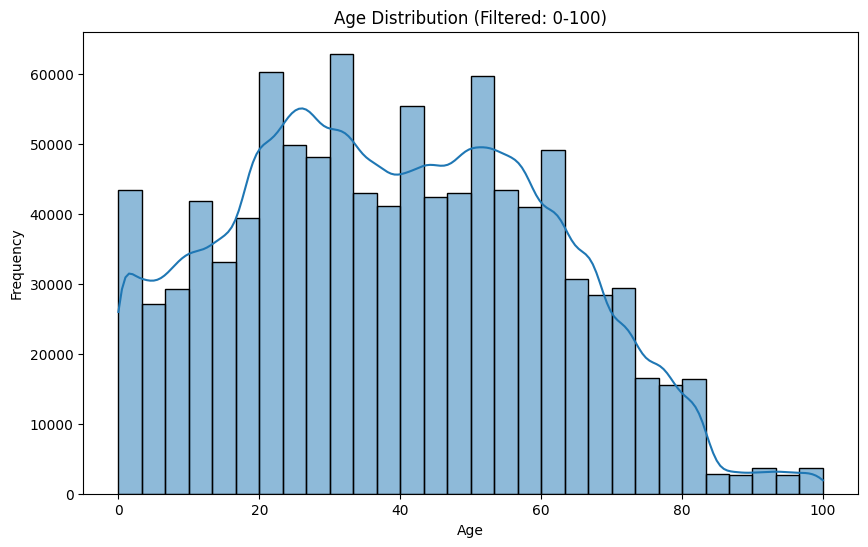

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_clean_filtered['AGE'], bins=30, kde=True)
plt.title("Age Distribution (Filtered: 0-100)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Columns Overview

- AGE (int64): Patient age.
- DIFFERENTIAL_DIAGNOSIS (object): The original string representation of the differential diagnosis list.
- SEX (object): Patient sex.
- PATHOLOGY (object): The diagnosed pathology.
- EVIDENCES (object): The original string representation of the evidence list.
- INITIAL_EVIDENCE (object): The evidence code for the initial evidence.
- DIFF_DIAG (object): The converted differential diagnosis (from string to a hashable tuple) for easier duplicate detection and further processing.
- primary_diag (object): The extracted primary diagnosis from the differential diagnosis.
- EVIDENCE_LIST (object): The converted version of the evidence list (also hashable).
- num_evidences (int64): The count of evidence items for each patient.

### Unique Pathologies

Issue: Possible spelling inconsistencies or duplicates
- The PATHOLOGY column should have 49 unique values, but sometimes different spellings or extra spaces can lead to variations.

In [62]:
df_clean['PATHOLOGY'] = df_clean['PATHOLOGY'].str.strip()
print("Unique Pathologies:", df_clean['PATHOLOGY'].nunique())


Unique Pathologies: 49


----- AGE Summary -----
count    1.015440e+06
mean     3.974921e+01
std      2.272826e+01
min      0.000000e+00
25%      2.200000e+01
50%      3.900000e+01
75%      5.600000e+01
max      1.090000e+02
Name: AGE, dtype: float64

----- SEX Value Counts -----
SEX
F    522523
M    492917
Name: count, dtype: int64

----- PATHOLOGY Value Counts -----
PATHOLOGY
URTI                                        64368
Viral pharyngitis                           61640
Anemia                                      50665
HIV (initial infection)                     29013
Localized edema                             27825
Anaphylaxis                                 27718
Pulmonary embolism                          27468
Influenza                                   26812
Bronchitis                                  26400
GERD                                        25979
Acute otitis media                          25911
Pneumonia                                   25761
Acute dystonic reactions                    

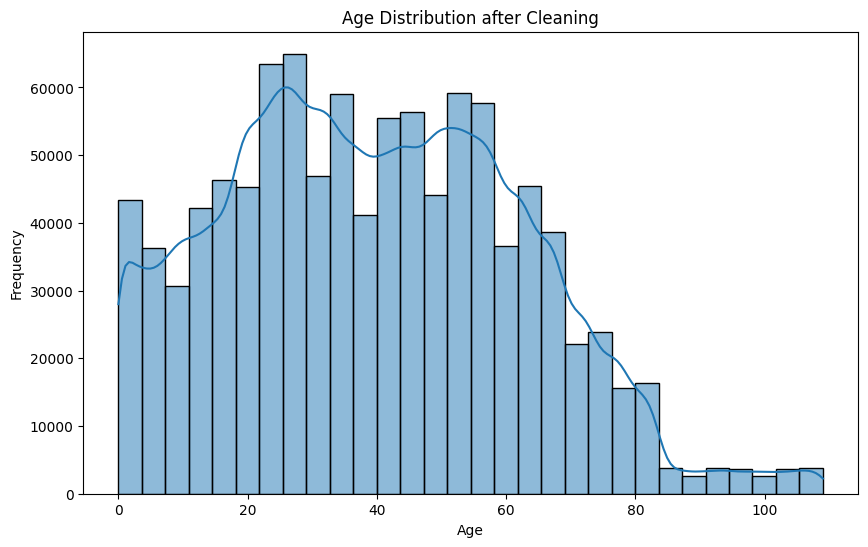

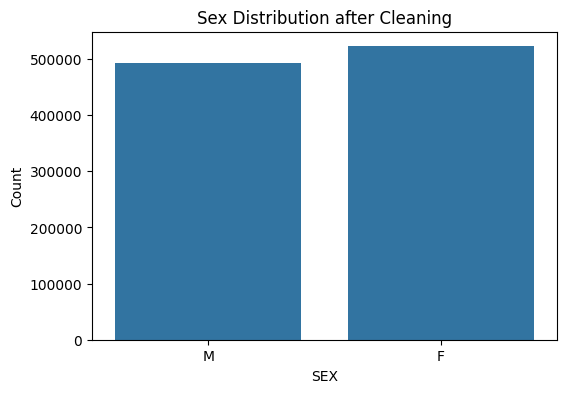

C:\Users\Averine\AppData\Local\Temp\ipykernel_10484\3609820913.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pathologies.values, y=top_pathologies.index, palette="viridis")


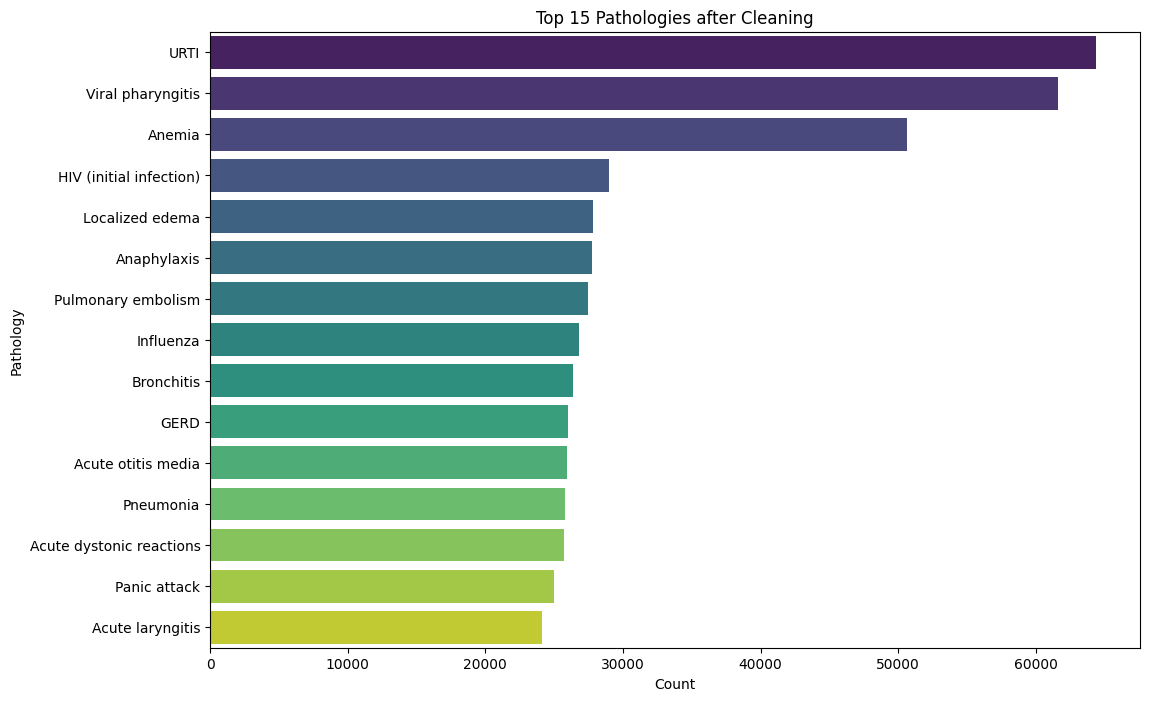


----- Duplicate Count (should be 0) -----
0


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Summary Statistics
print("----- AGE Summary -----")
print(df_clean['AGE'].describe())
print("\n----- SEX Value Counts -----")
print(df_clean['SEX'].value_counts())
print("\n----- PATHOLOGY Value Counts -----")
print(df_clean['PATHOLOGY'].value_counts())

# 2. Verify List-like Columns after Conversion
print("\n----- Sample DIFF_DIAG -----")
print(df_clean['DIFF_DIAG'].head(5))
print("\n----- Sample primary_diag -----")
print(df_clean['primary_diag'].head(5))
print("\n----- Sample EVIDENCE_LIST -----")
print(df_clean['EVIDENCE_LIST'].head(5))

# 3. Check Evidence Counts
print("\n----- num_evidences Summary -----")
print(df_clean['num_evidences'].describe())

# 4. Verify INITIAL_EVIDENCE Distribution
print("\n----- INITIAL_EVIDENCE (Top 10) -----")
print(df_clean['INITIAL_EVIDENCE'].value_counts().head(10))

# 5. Visual Checks

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['AGE'], bins=30, kde=True)
plt.title("Age Distribution after Cleaning")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=df_clean)
plt.title("Sex Distribution after Cleaning")
plt.xlabel("SEX")
plt.ylabel("Count")
plt.show()

# Pathology Distribution (showing top 15)
plt.figure(figsize=(12, 8))
top_pathologies = df_clean['PATHOLOGY'].value_counts().nlargest(15)
sns.barplot(x=top_pathologies.values, y=top_pathologies.index, palette="viridis")
plt.title("Top 15 Pathologies after Cleaning")
plt.xlabel("Count")
plt.ylabel("Pathology")
plt.show()

# Optional: Check Duplicate Count again (should be zero)
print("\n----- Duplicate Count (should be 0) -----")
print(df_clean.duplicated().sum())


In [64]:
print("\n----- SEX Distribution (Filtered Data) -----")
print(df_clean_filtered['SEX'].value_counts())

print("\n----- PATHOLOGY Distribution (Top 10, Filtered Data) -----")
print(df_clean_filtered['PATHOLOGY'].value_counts().head(10))



----- SEX Distribution (Filtered Data) -----
SEX
F    518239
M    488857
Name: count, dtype: int64

----- PATHOLOGY Distribution (Top 10, Filtered Data) -----
PATHOLOGY
URTI                       63894
Viral pharyngitis          61192
Anemia                     50285
HIV (initial infection)    28823
Localized edema            27627
Anaphylaxis                27497
Pulmonary embolism         27276
Influenza                  26605
Bronchitis                 26213
GERD                       25769
Name: count, dtype: int64


# Fixing the Differential_diagnosis Formatting

Issue: Stored as a string instead of a list
- The DIFFERENTIAL_DIAGNOSIS column contains a list of lists stored as a string.
- It needs to be properly converted into a Python list.

In [54]:
import ast

# Convert the string representation of lists into actual lists
df['DIFFERENTIAL_DIAGNOSIS'] = df['DIFFERENTIAL_DIAGNOSIS'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


### Handle EVIDENCES Formatting
Issue: Stored as a string instead of a list
- The EVIDENCES column is also stored as a string instead of a list.

In [55]:
df['EVIDENCES'] = df['EVIDENCES'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


#### Standardizing Sex Values

In [60]:
# Standardize sex values to 'M' and 'F'
df['SEX'] = df['SEX'].replace({'Male': 'M', 'Female': 'F'})
df

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE,DIFF_DIAG,primary_diag,EVIDENCE_LIST,num_evidences
0,18,"[[Bronchitis, 0.19171203430383882], [Pneumonia...",M,URTI,"[E_48, E_50, E_53, E_54_@_V_161, E_54_@_V_183,...",E_91,"[[Bronchitis, 0.19171203430383882], [Pneumonia...",Bronchitis,"[E_48, E_50, E_53, E_54_@_V_161, E_54_@_V_183,...",19
1,21,"[[HIV (initial infection), 0.5189500564407601]...",M,HIV (initial infection),"[E_9, E_27, E_50, E_51, E_53, E_54_@_V_198, E_...",E_50,"[[HIV (initial infection), 0.5189500564407601]...",HIV (initial infection),"[E_9, E_27, E_50, E_51, E_53, E_54_@_V_198, E_...",31
2,19,"[[Bronchitis, 0.11278064619119596], [Pneumonia...",F,Pneumonia,"[E_53, E_54_@_V_179, E_54_@_V_192, E_55_@_V_29...",E_77,"[[Bronchitis, 0.11278064619119596], [Pneumonia...",Bronchitis,"[E_53, E_54_@_V_179, E_54_@_V_192, E_55_@_V_29...",34
3,34,"[[URTI, 0.23859396799565236], [Cluster headach...",F,URTI,"[E_48, E_53, E_54_@_V_183, E_55_@_V_89, E_55_@...",E_53,"[[URTI, 0.23859396799565236], [Cluster headach...",URTI,"[E_48, E_53, E_54_@_V_183, E_55_@_V_89, E_55_@...",16
4,36,"[[URTI, 0.23677812769175735], [Influenza, 0.18...",M,URTI,"[E_49, E_50, E_53, E_54_@_V_183, E_55_@_V_62, ...",E_201,"[[URTI, 0.23677812769175735], [Influenza, 0.18...",URTI,"[E_49, E_50, E_53, E_54_@_V_183, E_55_@_V_62, ...",17
...,...,...,...,...,...,...,...,...,...,...
1025596,37,"[[Epiglottitis, 0.14834431793313382], [HIV (in...",F,Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",E_53,"[[Epiglottitis, 0.14834431793313382], [HIV (in...",Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",22
1025597,18,"[[Epiglottitis, 0.28156957795466475], [HIV (in...",M,Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",E_91,"[[Epiglottitis, 0.28156957795466475], [HIV (in...",Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",21
1025598,28,"[[Epiglottitis, 0.3703962237298842], [Larygosp...",F,Epiglottitis,"[E_53, E_54_@_V_192, E_55_@_V_20, E_55_@_V_21,...",E_91,"[[Epiglottitis, 0.3703962237298842], [Larygosp...",Epiglottitis,"[E_53, E_54_@_V_192, E_55_@_V_20, E_55_@_V_21,...",20
1025600,26,"[[Epiglottitis, 0.3028258988138983], [Acute la...",F,Epiglottitis,"[E_53, E_54_@_V_179, E_54_@_V_192, E_55_@_V_21...",E_194,"[[Epiglottitis, 0.3028258988138983], [Acute la...",Epiglottitis,"[E_53, E_54_@_V_179, E_54_@_V_192, E_55_@_V_21...",20


In [59]:
print(df['SEX'].value_counts())


SEX
F    514714
M    485569
Name: count, dtype: int64


In [61]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 AGE                       0
DIFFERENTIAL_DIAGNOSIS    0
SEX                       0
PATHOLOGY                 0
EVIDENCES                 0
INITIAL_EVIDENCE          0
DIFF_DIAG                 0
primary_diag              0
EVIDENCE_LIST             0
num_evidences             0
dtype: int64


In [65]:
# Identify unique initial evidence values
print(df['INITIAL_EVIDENCE'].value_counts())

# Fill missing values if any
df['INITIAL_EVIDENCE'] = df['INITIAL_EVIDENCE'].fillna("Unknown")


INITIAL_EVIDENCE
E_53     184391
E_66      83949
E_201     73926
E_181     48051
E_91      41053
          ...  
E_202       374
E_178       102
E_39         75
E_23          7
E_32          6
Name: count, Length: 96, dtype: int64


In [66]:
# Explode the 'EVIDENCE_LIST' column if not already done
df_evidences = df.explode('EVIDENCE_LIST')

# Print unique evidence codes
unique_evidence_codes = df_evidences['EVIDENCE_LIST'].unique()
print("Unique Evidence Codes:")
print(unique_evidence_codes)


Unique Evidence Codes:
['E_48' 'E_50' 'E_53' 'E_54_@_V_161' 'E_54_@_V_183' 'E_55_@_V_89'
 'E_55_@_V_108' 'E_55_@_V_167' 'E_56_@_4' 'E_57_@_V_123' 'E_58_@_3'
 'E_59_@_3' 'E_77' 'E_79' 'E_91' 'E_97' 'E_201' 'E_204_@_V_10' 'E_222'
 'E_9' 'E_27' 'E_51' 'E_54_@_V_198' 'E_55_@_V_62' 'E_55_@_V_166'
 'E_56_@_7' 'E_58_@_7' 'E_59_@_2' 'E_115' 'E_129' 'E_130_@_V_138'
 'E_131_@_V_10' 'E_132_@_0' 'E_133_@_V_90' 'E_133_@_V_91' 'E_133_@_V_95'
 'E_133_@_V_110' 'E_133_@_V_111' 'E_134_@_6' 'E_135_@_V_12' 'E_136_@_0'
 'E_148' 'E_162' 'E_189' 'E_54_@_V_179' 'E_54_@_V_192' 'E_55_@_V_29'
 'E_55_@_V_55' 'E_55_@_V_56' 'E_55_@_V_170' 'E_55_@_V_171' 'E_56_@_5'
 'E_58_@_2' 'E_59_@_6' 'E_78' 'E_94' 'E_106' 'E_118' 'E_123' 'E_124'
 'E_130_@_V_156' 'E_131_@_V_12' 'E_132_@_4' 'E_133_@_V_54' 'E_133_@_V_85'
 'E_134_@_0' 'E_135_@_V_10' 'E_144' 'E_175' 'E_181' 'E_55_@_V_109'
 'E_55_@_V_124' 'E_58_@_5' 'E_59_@_4' 'E_49' 'E_58_@_4' 'E_54_@_V_181'
 'E_55_@_V_122' 'E_55_@_V_125' 'E_56_@_6' 'E_57_@_V_89' 'E_57_@_V_122'
 'E_5

In [67]:
# Get a sample evidence code
sample_code = df_evidences['EVIDENCE_LIST'].iloc[0]
print("Sample Evidence Code:", sample_code)

# Split the sample code by underscores and special characters to inspect its parts
parts = sample_code.split('_')
print("Split parts:", parts)


Sample Evidence Code: E_48
Split parts: ['E', '48']


In [73]:
# Save as CSV
df.to_csv("ddxplus_cleaned.csv", index=False)
print("Cleaned data saved as ddxplus_cleaned.csv")



Cleaned data saved as ddxplus_cleaned.csv


## Data Cleaning & Enrichment Decisions
Cleaning Steps:

- Removed or flagged age outliers.
- Ensured consistent formatting for SEX, PATHOLOGY, and converted string representations of lists (in DIFFERENTIAL_DIAGNOSIS and EVIDENCES) to actual Python lists.

Enrichment:
- Pathology Enrichment:
    - Integrated release_conditions.json to map each pathology to a detailed description including the English name (cond-name-eng), ICD-10 codes, and severity levels.
- Evidence Enrichment:
    - Used release_evidences.json to map evidence codes to their associated English questions (question_en).
    - Created a new column with these evidence prompts for further customization.

###  Integrating the additional documentation from the JSON files can enrich your datase
 1. Load the JSON Documentation

In [74]:
import json

# Load release_evidences.json for evidence details.
with open('release_evidences.json', 'r') as f:
    evidence_docs = json.load(f)

# Load release_conditions.json for pathology details.
with open('release_conditions.json', 'r') as f:
    condition_docs = json.load(f)

# If the conditions file is a list, convert it to a dictionary using the condition_name as key.
if isinstance(condition_docs, list):
    condition_docs = {cond["condition_name"]: cond for cond in condition_docs}


### Mapping Evidence and Pathology Codes

In [75]:
def map_evidence_codes(evidence_list):
    """
    For each evidence code in the list, retrieve the English question ('question_en')
    from the evidence_docs. If not found, return the code.
    """
    if isinstance(evidence_list, list):
        return [evidence_docs.get(code, {}).get("question_en", code) for code in evidence_list]
    return evidence_list

# Create a new column with evidence prompts.
df['evidence_prompts'] = df['EVIDENCE_LIST'].apply(map_evidence_codes)

In [76]:
def map_pathology(pathology):
    """
    Using the conditions documentation, return a formatted description.
    The description includes the English name (cond-name-eng), ICD-10 code, and severity.
    """
    details = condition_docs.get(pathology)
    if details:
        return f"{details.get('cond-name-eng', pathology)} (ICD-10: {details.get('icd10-id', 'N/A')}, Severity: {details.get('severity', 'N/A')})"
    else:
        return f"{pathology} (No additional info found)"

# Create a new column with enriched pathology descriptions.
df['pathology_description'] = df['PATHOLOGY'].apply(map_pathology)


In [77]:
def create_context(row):
    """
    Build a comprehensive context string for each patient record.
    This includes demographic details, enriched pathology information, 
    and conversational symptom prompts.
    """
    # Join evidence prompts into a single string.
    evidence_str = "; ".join(row['evidence_prompts'])
    context = (
        f"Age: {row['AGE']}, Sex: {row['SEX']}. "
        f"Condition: {row['PATHOLOGY']} - {row['pathology_description']}. "
        f"Symptom prompts: {evidence_str}."
    )
    return context

df['context'] = df.apply(create_context, axis=1)

In [79]:
df

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE,DIFF_DIAG,primary_diag,EVIDENCE_LIST,num_evidences,evidence_descriptions,pathology_description,evidence_prompts,context
0,18,"[[Bronchitis, 0.19171203430383882], [Pneumonia...",M,URTI,"[E_48, E_50, E_53, E_54_@_V_161, E_54_@_V_183,...",E_91,"[[Bronchitis, 0.19171203430383882], [Pneumonia...",Bronchitis,"[E_48, E_50, E_53, E_54_@_V_161, E_54_@_V_183,...",19,"[Do you live with 4 or more people?, Have you ...","URTI (ICD-10: j06.9, Severity: 5)","[Do you live with 4 or more people?, Have you ...","Age: 18, Sex: M. Condition: URTI - URTI (ICD-1..."
1,21,"[[HIV (initial infection), 0.5189500564407601]...",M,HIV (initial infection),"[E_9, E_27, E_50, E_51, E_53, E_54_@_V_198, E_...",E_50,"[[HIV (initial infection), 0.5189500564407601]...",HIV (initial infection),"[E_9, E_27, E_50, E_51, E_53, E_54_@_V_198, E_...",31,"[Do you have swollen or painful lymph nodes?, ...","HIV (initial infection) (ICD-10: B20, Severity...","[Do you have swollen or painful lymph nodes?, ...","Age: 21, Sex: M. Condition: HIV (initial infec..."
2,19,"[[Bronchitis, 0.11278064619119596], [Pneumonia...",F,Pneumonia,"[E_53, E_54_@_V_179, E_54_@_V_192, E_55_@_V_29...",E_77,"[[Bronchitis, 0.11278064619119596], [Pneumonia...",Bronchitis,"[E_53, E_54_@_V_179, E_54_@_V_192, E_55_@_V_29...",34,"[Do you have pain somewhere, related to your r...","Pneumonia (ICD-10: j17, j18, Severity: 3)","[Do you have pain somewhere, related to your r...","Age: 19, Sex: F. Condition: Pneumonia - Pneumo..."
3,34,"[[URTI, 0.23859396799565236], [Cluster headach...",F,URTI,"[E_48, E_53, E_54_@_V_183, E_55_@_V_89, E_55_@...",E_53,"[[URTI, 0.23859396799565236], [Cluster headach...",URTI,"[E_48, E_53, E_54_@_V_183, E_55_@_V_89, E_55_@...",16,"[Do you live with 4 or more people?, Do you ha...","URTI (ICD-10: j06.9, Severity: 5)","[Do you live with 4 or more people?, Do you ha...","Age: 34, Sex: F. Condition: URTI - URTI (ICD-1..."
4,36,"[[URTI, 0.23677812769175735], [Influenza, 0.18...",M,URTI,"[E_49, E_50, E_53, E_54_@_V_183, E_55_@_V_62, ...",E_201,"[[URTI, 0.23677812769175735], [Influenza, 0.18...",URTI,"[E_49, E_50, E_53, E_54_@_V_183, E_55_@_V_62, ...",17,"[Do you attend or work in a daycare?, Have you...","URTI (ICD-10: j06.9, Severity: 5)","[Do you attend or work in a daycare?, Have you...","Age: 36, Sex: M. Condition: URTI - URTI (ICD-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025596,37,"[[Epiglottitis, 0.14834431793313382], [HIV (in...",F,Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",E_53,"[[Epiglottitis, 0.14834431793313382], [HIV (in...",Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",22,[Do you have pain that improves when you lean ...,"Epiglottitis (ICD-10: J05.1, Severity: 2)",[Do you have pain that improves when you lean ...,"Age: 37, Sex: F. Condition: Epiglottitis - Epi..."
1025597,18,"[[Epiglottitis, 0.28156957795466475], [HIV (in...",M,Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",E_91,"[[Epiglottitis, 0.28156957795466475], [HIV (in...",Epiglottitis,"[E_33, E_53, E_54_@_V_179, E_54_@_V_192, E_55_...",21,[Do you have pain that improves when you lean ...,"Epiglottitis (ICD-10: J05.1, Severity: 2)",[Do you have pain that improves when you lean ...,"Age: 18, Sex: M. Condition: Epiglottitis - Epi..."
1025598,28,"[[Epiglottitis, 0.3703962237298842], [Larygosp...",F,Epiglottitis,"[E_53, E_54_@_V_192, E_55_@_V_20, E_55_@_V_21,...",E_91,"[[Epiglottitis, 0.3703962237298842], [Larygosp...",Epiglottitis,"[E_53, E_54_@_V_192, E_55_@_V_20, E_55_@_V_21,...",20,"[Do you have pain somewhere, related to your r...","Epiglottitis (ICD-10: J05.1, Severity: 2)","[Do you have pain somewhere, related to your r...","Age: 28, Sex: F. Condition: Epiglottitis - Epi..."
1025600,26,"[[Epiglottitis, 0.3028258988138983], [Acute la...",F,Epiglottitis,"[E_53, E_54_@_V_179, E_54_@_V_192, E_55_@_V_21...",E_194,"[[Epiglottitis, 0.3028258988138983], [Acute la...",E

   AGE SEX                PATHOLOGY  \
0   18   M                     URTI   
1   21   M  HIV (initial infection)   
2   19   F                Pneumonia   
3   34   F                     URTI   
4   36   M                     URTI   

                               pathology_description  \
0                  URTI (ICD-10: j06.9, Severity: 5)   
1  HIV (initial infection) (ICD-10: B20, Severity...   
2          Pneumonia (ICD-10: j17, j18, Severity: 3)   
3                  URTI (ICD-10: j06.9, Severity: 5)   
4                  URTI (ICD-10: j06.9, Severity: 5)   

                                    evidence_prompts  \
0  [Do you live with 4 or more people?, Have you ...   
1  [Do you have swollen or painful lymph nodes?, ...   
2  [Do you have pain somewhere, related to your r...   
3  [Do you live with 4 or more people?, Do you ha...   
4  [Do you attend or work in a daycare?, Have you...   

                                             context  
0  Age: 18, Sex: M. Condition: URTI 

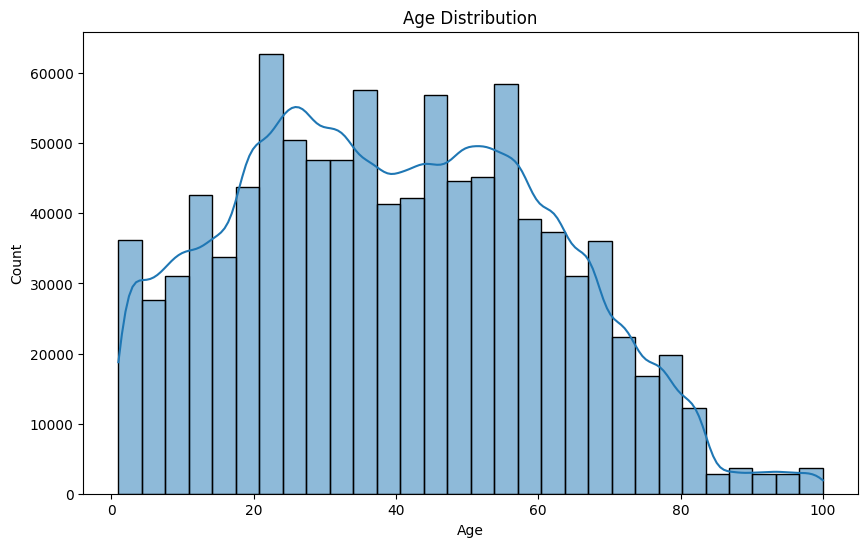

In [78]:
# Print a sample of the enriched columns.
print(df[['AGE', 'SEX', 'PATHOLOGY', 'pathology_description', 'evidence_prompts', 'context']].head())

# Optionally, visualize the distribution of some fields.
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Question Customization Function

In [83]:
def customize_evidence_question(question):
    """
    Transform diagnostic evidence questions into more conversational and patient-friendly prompts.
    Adjust or add rules as necessary.
    """
    # Normalize the question.
    q_lower = question.lower().strip()
    
    # Example rules for customizing the questions:
    # Rule: Swollen lymph nodes.
    if "swollen" in q_lower and "lymph" in q_lower:
        return "Have you noticed any unusual swelling or tenderness in your neck or lymph nodes?"
    
    # Rule: Living situation.
    elif "live with" in q_lower and "people" in q_lower:
        return "Could you tell me about your living situation and who you share your home with?"
    
    # Rule: General pain.
    elif "pain" in q_lower:
        return "Are you experiencing any persistent pain or discomfort? Please describe its location and intensity."
    
    # Rule: Fever.
    elif "fever" in q_lower:
        return "Have you been feeling feverish or experiencing chills recently?"
    
    # Rule: Cough.
    elif "cough" in q_lower:
        return "Are you having a cough? If yes, can you describe how frequent or severe it is?"
    
    # Rule: Daycare or school exposure.
    elif "daycare" in q_lower or "school" in q_lower:
        return "Do you often spend time in crowded places like schools or daycares?"
    
    # Rule: Smoke exposure.
    elif "smoke" in q_lower:
        return "Do you smoke or are you regularly exposed to cigarette smoke?"
    
    # Rule: Shortness of breath.
    elif "shortness of breath" in q_lower:
        return "Have you been experiencing shortness of breath or difficulty breathing?"
    
    # Rule: Nausea or vomiting.
    elif "nausea" in q_lower or "vomit" in q_lower:
        return "Have you been feeling nauseous or have you experienced any vomiting?"
    
    # Rule: Dizziness.
    elif "dizzy" in q_lower:
        return "Have you been feeling dizzy or lightheaded?"
    
    # Rule: Headache.
    elif "headache" in q_lower:
        return "Have you been having headaches? If so, how would you describe their frequency and severity?"
    
    # Rule: Fatigue.
    elif "fatigue" in q_lower or "tired" in q_lower:
        return "Have you been feeling unusually tired or fatigued?"
    
    # Rule: Sore throat.
    elif "sore throat" in q_lower:
        return "Are you experiencing a sore throat? Does it make swallowing difficult?"
    
    # Rule: Chills.
    elif "chills" in q_lower:
        return "Have you experienced any chills or episodes of shivering?"
    
    # Rule: Body or muscle aches.
    elif "body ache" in q_lower or "muscle pain" in q_lower:
        return "Do you have any body aches or muscle pain?"
    
    # Default: Generic prompt if none of the rules match.
    else:
        return "Could you provide more details about your symptoms?"

def customize_evidence_list(evidence_list):
    """
    Apply the customization function to each evidence question in the list.
    """
    if isinstance(evidence_list, list):
        return [customize_evidence_question(q) for q in evidence_list]
    return evidence_list

# Example usage:
sample_evidence = [
    "Do you live with 4 or more people?",
    "Do you have swollen or painful lymph nodes?",
    "Are you experiencing pain in your chest?",
    "Do you have a persistent cough?",
    "Have you been feeling feverish?",
    "Do you experience dizziness?"
]

customized = [customize_evidence_question(q) for q in sample_evidence]
for original, custom in zip(sample_evidence, customized):
    print("Original:", original)
    print("Customized:", custom)
    print("------")


Original: Do you live with 4 or more people?
Customized: Could you tell me about your living situation and who you share your home with?
------
Original: Do you have swollen or painful lymph nodes?
Customized: Have you noticed any unusual swelling or tenderness in your neck or lymph nodes?
------
Original: Are you experiencing pain in your chest?
Customized: Are you experiencing any persistent pain or discomfort? Please describe its location and intensity.
------
Original: Do you have a persistent cough?
Customized: Are you having a cough? If yes, can you describe how frequent or severe it is?
------
Original: Have you been feeling feverish?
Customized: Have you been feeling feverish or experiencing chills recently?
------
Original: Do you experience dizziness?
Customized: Could you provide more details about your symptoms?
------


In [85]:
# Apply the function to create a new column with customized evidence prompts.
df['custom_evidence_prompts'] = df['evidence_prompts'].apply(customize_evidence_list)


### Updation the Context Field 

Custom evidence prompts into our context string that will be used by our retrieval model.

In [81]:
def create_custom_context(row):
    evidence_str = "; ".join(row['custom_evidence_prompts'])
    context = (
        f"Age: {row['AGE']}, Sex: {row['SEX']}. "
        f"Condition: {row['PATHOLOGY']} - {row['pathology_description']}. "
        f"Symptom prompts: {evidence_str}."
    )
    return context

df['custom_context'] = df.apply(create_custom_context, axis=1)

# Verify a sample of the new context.
print(df[['AGE', 'SEX', 'PATHOLOGY', 'custom_context']].head())


   AGE SEX                PATHOLOGY  \
0   18   M                     URTI   
1   21   M  HIV (initial infection)   
2   19   F                Pneumonia   
3   34   F                     URTI   
4   36   M                     URTI   

                                      custom_context  
0  Age: 18, Sex: M. Condition: URTI - URTI (ICD-1...  
1  Age: 21, Sex: M. Condition: HIV (initial infec...  
2  Age: 19, Sex: F. Condition: Pneumonia - Pneumo...  
3  Age: 34, Sex: F. Condition: URTI - URTI (ICD-1...  
4  Age: 36, Sex: M. Condition: URTI - URTI (ICD-1...  


In [86]:
df.to_csv("ddxplus_enriched_custom.csv", index=False)
print("Data saved to ddxplus_enriched_custom.csv")


Data saved to ddxplus_enriched_custom.csv


### Customization & Model Integration
Customizing Evidence Prompts:
- Developed a customize_evidence_question() function with multiple rules (e.g., rephrasing “Do you live with 4 or more people?” to “Could you tell me about your living environment?”).
- Created a new column custom_evidence_prompts to preserve both the original and customized versions.

Context Field Creation:
- Constructed a comprehensive context column that combines age, sex, enriched pathology details, and the (customized) symptom prompts.
Integration for RAG Model:

- Planned to embed the context strings using a pretrained Sentence Transformer.
- Index these embeddings with FAISS for efficient retrieval.
- The retrieved contexts, along with patient queries, will serve as input for our Retrieval-Augmented Generation (RAG) model, ensuring more informed and conversational responses.

### Next Steps: Integrate the Enriched Data with our Model Pipeline
Create Context Embeddings: Convert each enriched context (here, your custom_context) into a vector representation using a pretrained embedding model.
Index the Embeddings: Use an indexing library (such as FAISS) to build a vector index.
Retrieve Contexts: Given a new user query, find the most similar contexts and feed these into your generation model.